This script is used for the analysis of the experimental results, correlating the results with the proposed activity scoring strategy.

In [25]:
import os
from os.path import join
import pandas as pd
import numpy as np
CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

d:\Python\aox\enzyme-mining-aox


In [26]:
DATADIR = os.path.join(CURRENT_DIR, "data", "aox")
RAWDIR = os.path.join(DATADIR, "raw")
RESULTDIR = join(DATADIR, "result")
SSN_DIR = join(DATADIR, "graph", "acc")

filenames = {
    "experiment_result": join(RESULTDIR, "experiment_result.tsv"), # the experiment results
    "sequence_picked": join(RESULTDIR, "sequence_picked_results.tsv"), # the picked sequence
    "known_sequence": join(RAWDIR, "known_sequence.tsv"), # the refered sequence (22)
    "node_new": join(SSN_DIR, "node_new.tsv"),
    "sequence_picked_result": join(RESULTDIR, "sequence_picked_results.tsv"),
}

In [27]:
# Disambiguation: uniprot and NCBI accession
ncbi_uniprot_map = [
    ['EAA66666.1', 'Q5BFW3'],
    ['AAR89538.1', 'Q9C1S3'],
    ['AAV66468.1', 'Q5S057'],
    ['AAV66467.2', 'Q5S058'],
    ['AAF82788.1', 'Q9P304'],
    ['XP_001838223.2', 'A8P219'],
    ['XP_007868339.1', 'S7RFS3'], # A8DPS4
    ['A8DPS4', 'S7RFS3'],
    ['CAM84030.1', 'A6PZG7'],
    ['CAM84031.1', 'A6PZG8'],
    ['CAM84032.1', 'A6PZG9'],
    ['AAB57849.1', 'F2QY27'],
    ['AAB57850.1', 'F2R038'],
    ['AFO55203.1', 'I7CMK2'],
    ['AHC95541.1', 'A0A067YIW8'],
    ['AAL56054.1', 'Q8X1N1'],
    ['UXW61383.1', 'A0A977TIR6'],
    ['AAF02495.1', 'Q9UVU1'],
    ['AAF02494.1', 'Q9UVU2'],
    ['AAQ99151.1', 'Q6TAW1'],
    ['AAV66465.1', 'Q5S060'],
    ['AAV66466.1', 'Q5S059'],
    ['CDG66232.1', 'T2M2J4']
]
ncbi_uniprot_map = {
    k:v for k,v in ncbi_uniprot_map
}

In [28]:
pd.read_csv(filenames['sequence_picked'], sep='\t')

,id,seq,seq_score,acc,active_sequence,taxid,tax_score,organism,sequence_id
0,AAV66466.1/1-664,MAIPDEFDIIVVGGGST----GCALAGR----------LGNLD-EN...,34.0,AAV66466.1,True,300826,0.015873,Pichia sp. BZ159,AAV66466.1
1,AAF02494.1/1-664,MAIPDEFDIIVVGGGST----GCALAGR----------LGNLD-EN...,34.0,AAF02494.1,True,1156966,1.076742,Ogataea methanolica,AAF02494.1
2,AAV66465.1/1-664,MAIPDEFDIIVVGGGST----GCAIAGR----------LGNLD-EN...,34.0,AAV66465.1,True,300826,0.015873,Pichia sp. BZ159,AAV66465.1
3,AAF02495.1/1-663,MAIPEEFDIIVVGGGSA----GCPTAGR----------LANLD-PN...,34.0,AAF02495.1,True,1156966,1.076742,Ogataea methanolica,AAF02495.1
4,CAM84030.1/1-664,MAIPDEFDIIVVGGGST----GCCIAGR----------LANLDdQN...,34.0,CAM84030.1,True,870730,3.076742,Ogataea angusta,CAM84030.1
...,...,...,...,...,...,...,...,...,...
355,tr|A0A0B7F5J3|A0A0B7F5J3_THACB/10-637,--EPQEVDVIVAGGGPA----GCVVAGR----------LAKAD-PN...,33.6,A0A0B7F5J3_THACB,False,1108050,0.000219,Rhizoctonia solani AG-1 IB,A0A0B7F5J3
356,tr|A0A074S3I4|A0A074S3I4_9AGAM/25-665,--EPQEVDVIVAGGGPA----GCVVAGR----------LAKAD-PN...,33.6,A0A074S3I4_9AGAM,False,1423351,0.000219,Rhizoctonia solani 123E,A0A074S3I4
357,tr|A0A067SV84|A0A067SV84_GALM3/1-638,MGHPDEVDVIVCGGGPA----GCVTAGR----------LAYAD-PT...,33.6,A0A067SV84_GALM3,False,685588,0.000219,Galerina marginata CBS 339.88,A0A067SV84
358,tr|A0A1Y2BZ16|A0A1Y2BZ16_9BASI/40-670,-MIPQEVDIIVVGGGPA----GCATAGR----------LARAD-PN...,33.6,A0A1Y2BZ16_9BASI,False,106004,0.000159,Leucosporidium creatinivorum,A0A1Y2BZ16


In [29]:
sequence_picked_id = pd.read_csv(filenames['sequence_picked'], sep='\t')['sequence_id'].to_list()
sequence_picked_id = set(ncbi_uniprot_map.get(i, i) for i in sequence_picked_id)
print(len(sequence_picked_id)) # 357

357


In [30]:
experiment_result = pd.read_csv(filenames['experiment_result'], sep='\t')
experiment_result['r_name'] = experiment_result['name'].apply(lambda x: ncbi_uniprot_map.get(x, x))
experiment_result['picked'] = experiment_result['r_name'].apply(lambda x: x in sequence_picked_id)
experiment_result['referenced'] = experiment_result['name'].apply(lambda x:  x in ncbi_uniprot_map.keys())
bl_merge_2_3 = True
if bl_merge_2_3:

    experiment_result['round'] = experiment_result['round'].apply(lambda x: 2 if x==3 else x)
experiment_result = experiment_result.sort_values(by=['round', 'activity(mU/mg)', 'Yield (mg/L)', 'picked', 'r_name'], ascending=[True, False, False, False, True]).reset_index(drop=True)
# S7RFS3 # A8DPS4
# A0A642VDA0 # unique
experiment_result

,#id,name,round,inclusion,activity(mU/mg),SD,Yield (mg/L),r_name,picked,referenced
0,36,A8DPS4,1,0,1432.4,102.0,184.0,S7RFS3,True,True
1,35,A0A642VDA0,1,0,241.9,10.9,40.0,A0A642VDA0,False,False
2,38,G8ZNE6,1,0,0.0,0.0,148.0,G8ZNE6,False,False
3,43,Q7X2H8,1,0,0.0,0.0,112.0,Q7X2H8,False,False
4,41,Q00922,1,0,0.0,0.0,76.0,Q00922,False,False
5,42,Q6CEP8,1,0,0.0,0.0,53.0,Q6CEP8,False,False
6,40,P56216,1,0,0.0,0.0,35.0,P56216,False,False
7,34,A0A1E3PW31,1,0,0.0,0.0,31.0,A0A1E3PW31,False,False
8,32,A0A067YIW8,1,1,0.0,0.0,0.0,A0A067YIW8,True,False
9,37,C4R702,1,1,0.0,0.0,0.0,C4R702,True,False


In [31]:
print('picked', len(experiment_result[experiment_result['picked']])) # 34
print('referenced', len(experiment_result[experiment_result['referenced']])) # 9
experiment_result[experiment_result['referenced']]

picked 34
referenced 9


,#id,name,round,inclusion,activity(mU/mg),SD,Yield (mg/L),r_name,picked,referenced
0,36,A8DPS4,1,0,1432.4,102.0,184.0,S7RFS3,True,True
21,31,CDG66232.1,2,0,122.6,6.3,91.0,T2M2J4,True,True
23,27,AAL56054.1,2,0,39.3,6.6,60.0,Q8X1N1,True,True
24,14,XP_001838223.2,2,0,39.1,1.2,23.0,A8P219,True,True
26,19,AAV66465.1,2,0,24.9,5.6,4.0,Q5S060,True,True
28,25,AAF02495.1,2,0,18.5,2.8,19.0,Q9UVU1,True,True
29,24,EAA66666.1,2,0,17.4,6.0,14.0,Q5BFW3,True,True
39,16,AAR89538.1,2,1,0.0,0.0,0.0,Q9C1S3,True,True
40,18,AAF82788.1,2,1,0.0,0.0,0.0,Q9P304,True,True


In [32]:
experiment_result[(experiment_result['picked']) & (~experiment_result['referenced'])]

,#id,name,round,inclusion,activity(mU/mg),SD,Yield (mg/L),r_name,picked,referenced
8,32,A0A067YIW8,1,1,0.0,0.0,0.0,A0A067YIW8,True,False
9,37,C4R702,1,1,0.0,0.0,0.0,C4R702,True,False
12,8,A0A4U6X6L6,2,0,8647.0,294.9,55.3,A0A4U6X6L6,True,False
13,7,A0A423XHQ7,2,0,7946.0,697.5,18.8,A0A423XHQ7,True,False
14,12,A0A5N5JXS7,2,0,5997.7,79.4,10.4,A0A5N5JXS7,True,False
15,1,A0A0E0SDM0,2,0,4087.3,281.9,87.9,A0A0E0SDM0,True,False
16,9,A0A4Z1KC62,2,0,3170.8,738.2,11.1,A0A4Z1KC62,True,False
17,10,A0A5B1QN96,2,0,1269.8,423.5,4.0,A0A5B1QN96,True,False
18,4,A0A1X6MWH7,2,0,912.7,229.4,150.8,A0A1X6MWH7,True,False
19,29,A0A0D2AFJ7,2,0,369.6,34.5,49.0,A0A0D2AFJ7,True,False


In [33]:
experiment_result[~experiment_result['picked']]

,#id,name,round,inclusion,activity(mU/mg),SD,Yield (mg/L),r_name,picked,referenced
1,35,A0A642VDA0,1,0,241.9,10.9,40.0,A0A642VDA0,False,False
2,38,G8ZNE6,1,0,0.0,0.0,148.0,G8ZNE6,False,False
3,43,Q7X2H8,1,0,0.0,0.0,112.0,Q7X2H8,False,False
4,41,Q00922,1,0,0.0,0.0,76.0,Q00922,False,False
5,42,Q6CEP8,1,0,0.0,0.0,53.0,Q6CEP8,False,False
6,40,P56216,1,0,0.0,0.0,35.0,P56216,False,False
7,34,A0A1E3PW31,1,0,0.0,0.0,31.0,A0A1E3PW31,False,False
10,33,A0A084GBF2,1,1,0.0,0.0,0.0,A0A084GBF2,False,False
11,39,M5CAV1,1,1,0.0,0.0,0.0,M5CAV1,False,False


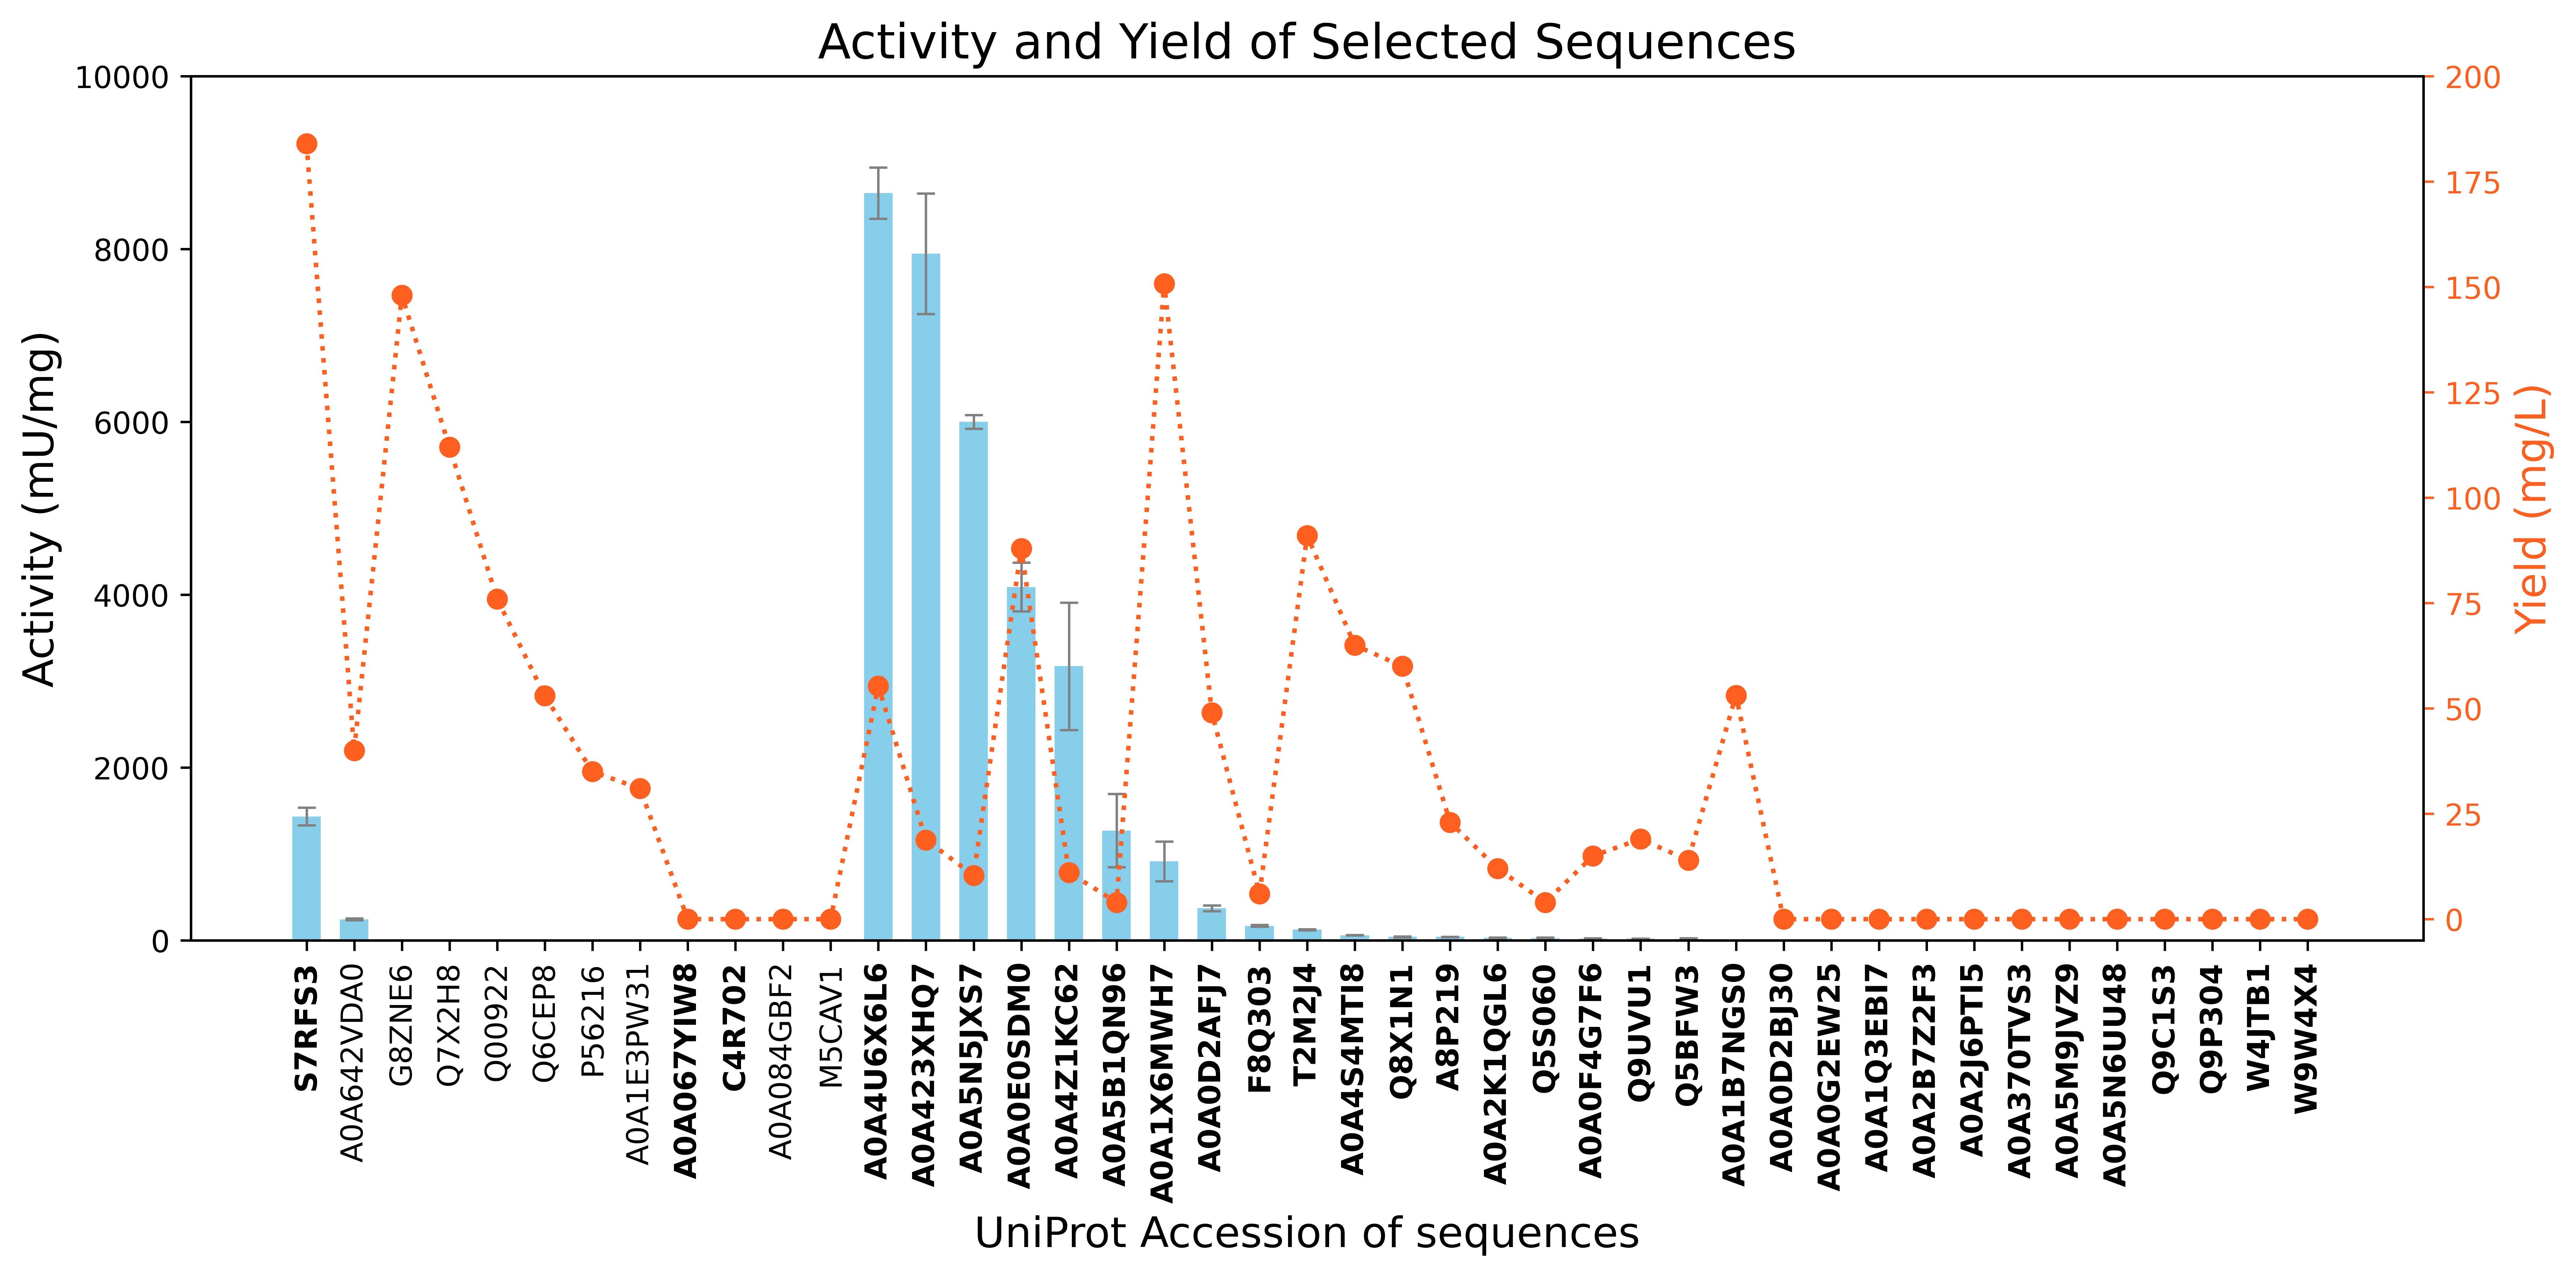

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

color_yield = '#FF5F1F'

fig, ax1 = plt.subplots(figsize=(12, 6), dpi=600)

ax1.bar(
    experiment_result['r_name'], 
    experiment_result['activity(mU/mg)'], 
    width=0.6, 
    label='Activity (mU/mg)', 
    color='skyblue', 
    yerr=experiment_result['SD'], 
    error_kw={
        'elinewidth': 0.8, 
        'ecolor': 'gray', 
        'capsize': 3, 
        'capthick': 0.8
    }
)
ax1.set_xlabel("UniProt Accession of sequences", fontsize=14)
ax1.set_ylabel("Activity (mU/mg)", fontsize=14)
ax1.set_ylim((0,10000))
ax1.set_title("Activity and Yield of Selected Sequences", fontsize=16)
ax1.tick_params(axis='x', rotation=90)
for label, bl_picked in zip(ax1.get_xticklabels(), experiment_result['picked']):
    label.set_ha('right')
    label.set_va('center')
    label.set_rotation_mode('anchor')
    if bl_picked:
        label.set_fontweight('bold')

ax2 = ax1.twinx()
ax2.plot(experiment_result['r_name'], experiment_result['Yield (mg/L)'], linestyle='dotted', marker='o', color=color_yield, label='Yield (mg/L)')
ax2.set_ylabel("Yield (mg/L)", fontsize=14, color=color_yield)
ax2.set_ylim((-5,200))
ax2.tick_params(axis='y', colors=color_yield)

plt.tight_layout()
plt.show()

In [35]:
node_new = pd.read_csv(filenames['node_new'], sep='\t', index_col=0)
node_new.head()

,accession,class,phylum,active_sequence,active_tax,score,selected,active
0,A0A010RMG6,Sordariomycetes,Ascomycota,False,False,0.000250,0.0,0.0
1,A0A017SR18,Eurotiomycetes,Ascomycota,False,False,0.000967,0.0,0.0
2,A0A060SVX6,Agaricomycetes,Basidiomycota,False,False,0.000816,0.0,0.0
3,A0A066X5A7,Sordariomycetes,Ascomycota,False,False,0.000250,0.0,0.0
4,A0A067N510,Agaricomycetes,Basidiomycota,False,False,0.000219,0.0,0.0


In [36]:
experiment_result_picked_with_tax = pd.merge(
    experiment_result[experiment_result['picked']==True], 
    node_new[['accession', 'phylum', 'class', 'score']], 
    left_on='r_name', right_on='accession', how='left'
)

In [37]:
experiment_result_picked_with_tax.to_csv(r"D:\Downloads\temp-33.tsv")

In [38]:
experiment_result_picked_with_tax.head()

,#id,name,round,inclusion,activity(mU/mg),SD,Yield (mg/L),r_name,picked,referenced,accession,phylum,class,score
0,36,A8DPS4,1,0,1432.4,102.0,184.0,S7RFS3,True,True,S7RFS3,Basidiomycota,Agaricomycetes,0.000219
1,32,A0A067YIW8,1,1,0.0,0.0,0.0,A0A067YIW8,True,False,A0A067YIW8,Ascomycota,Saccharomycetes,1.076742
2,37,C4R702,1,1,0.0,0.0,0.0,C4R702,True,False,C4R702,Ascomycota,Saccharomycetes,1.563146
3,8,A0A4U6X6L6,2,0,8647.0,294.9,55.3,A0A4U6X6L6,True,False,A0A4U6X6L6,Ascomycota,Sordariomycetes,0.000250
4,7,A0A423XHQ7,2,0,7946.0,697.5,18.8,A0A423XHQ7,True,False,A0A423XHQ7,Ascomycota,Sordariomycetes,0.000250


In [39]:
experiment_result_picked_with_tax['phylum'].unique()

array(['Basidiomycota', 'Ascomycota', 'Platyhelminthes'], dtype=object)

In [40]:
experiment_result_picked_with_tax['class'].unique()

array(['Agaricomycetes', 'Saccharomycetes', 'Sordariomycetes',
       'Leotiomycetes', 'Dothideomycetes', 'Eurotiomycetes', 'Cestoda'],
      dtype=object)

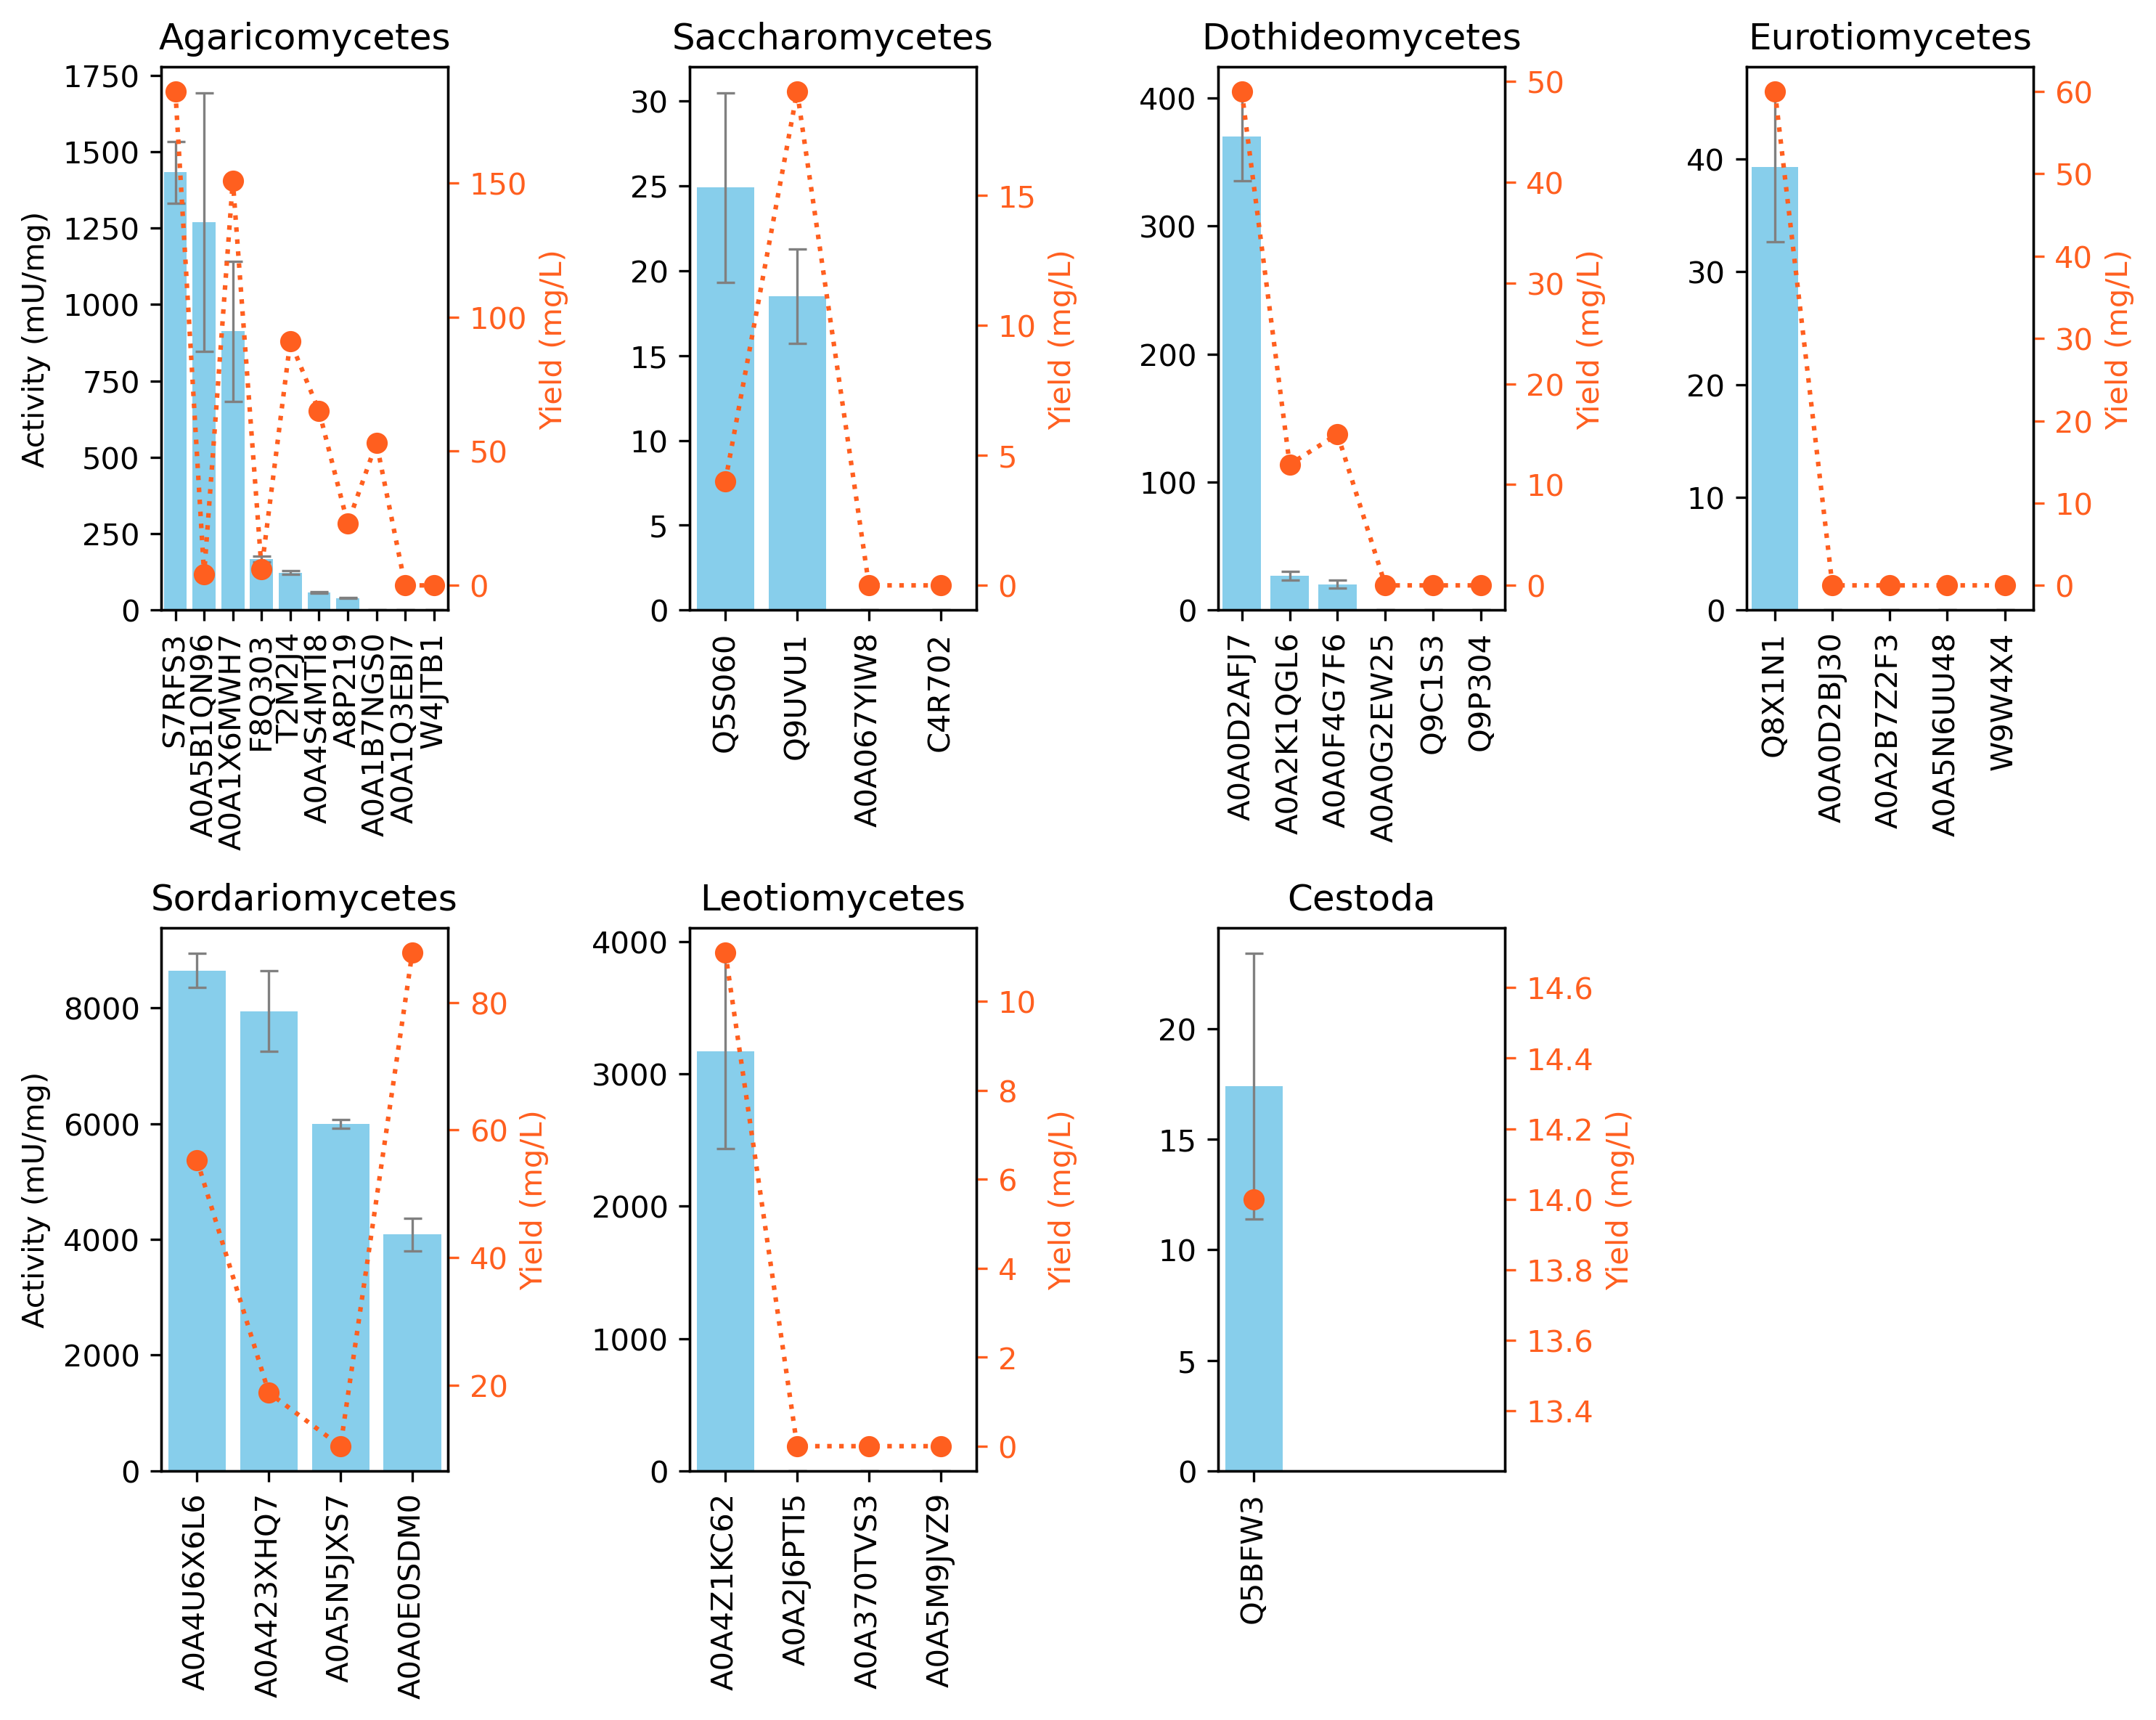

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

bl_tax_score = False
bl_activity_threshold = False
bl_yield = True

activity_threshold = 1000
results = []

df = experiment_result_picked_with_tax

# Plotting by class
classes = [
    'Agaricomycetes',
    'Saccharomycetes',
    'Dothideomycetes',
    'Eurotiomycetes',
    'Sordariomycetes',
    'Leotiomycetes',
    'Cestoda',
]

# Adjusted code to control xlim or bar width for consistency
if bl_tax_score:
    figsize = (12, 8)
else:
    figsize = (10, 8)
fig_class, axes_class = plt.subplots(2, 4, figsize=figsize, dpi=300)

axes_class = axes_class.flatten()

for i, cls in enumerate(classes):
    subset = df[df['class'] == cls]
    subset = subset.sort_values(by='activity(mU/mg)', ascending=False)
    ax = axes_class[i]
    x_positions = range(len(subset))  # Adjust x positions based on the subset size

    # Plot with a consistent bar width
    ax.bar(
        x_positions,
        subset['activity(mU/mg)'],
        yerr=subset['SD'],
        color='skyblue',
        width=0.8,
        error_kw={
            'elinewidth': 0.8,
            'ecolor': 'gray',
            'capsize': 3,
            'capthick': 0.8
        }
    )
    
    if bl_activity_threshold:
        if subset['activity(mU/mg)'].max() > activity_threshold:
            ax.axhline(y=activity_threshold, color='red', linestyle='--')

    # Adjust xlim to maintain visual consistency
    ax.set_xlim([-0.5, -0.5+max(4, len(subset))])
    ax.set_title(f"{cls}")
    ax.set_ylabel("Activity (mU/mg)" if i % 4 == 0 else "")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset['r_name'], rotation=90)

    results.append([
        cls,
        sum(subset['activity(mU/mg)'] > activity_threshold),
        sum(subset['activity(mU/mg)'] > 0.1),
        len(subset)
    ])

    # Add a secondary y-axis for 'score'
    if bl_tax_score:
        ax2 = ax.twinx()
        ax2.plot(
            x_positions,
            subset['score'],
            linestyle='dotted',
            marker='o',
            color='blue',
            label='Score'
        )
        ax2.set_ylabel("Tax Score" if (i+1) % 4 == 0 else "", color='blue')
        ax2.tick_params(axis='y', colors='blue')

    if bl_yield:
        ax2 = ax.twinx()
        ax2.plot(
            x_positions,
            subset['Yield (mg/L)'],
            linestyle='dotted',
            marker='o',
            color=color_yield,
            label='Yield (mg/L)'
        )
        ax2.set_ylabel("Yield (mg/L)", color=color_yield)
        # ax2.set_ylim((-5,200))
        ax2.tick_params(axis='y', colors=color_yield)

# Hide any extra subplots
for j in range(len(classes), len(axes_class)):
    fig_class.delaxes(axes_class[j])

fig_class.tight_layout()
plt.show()




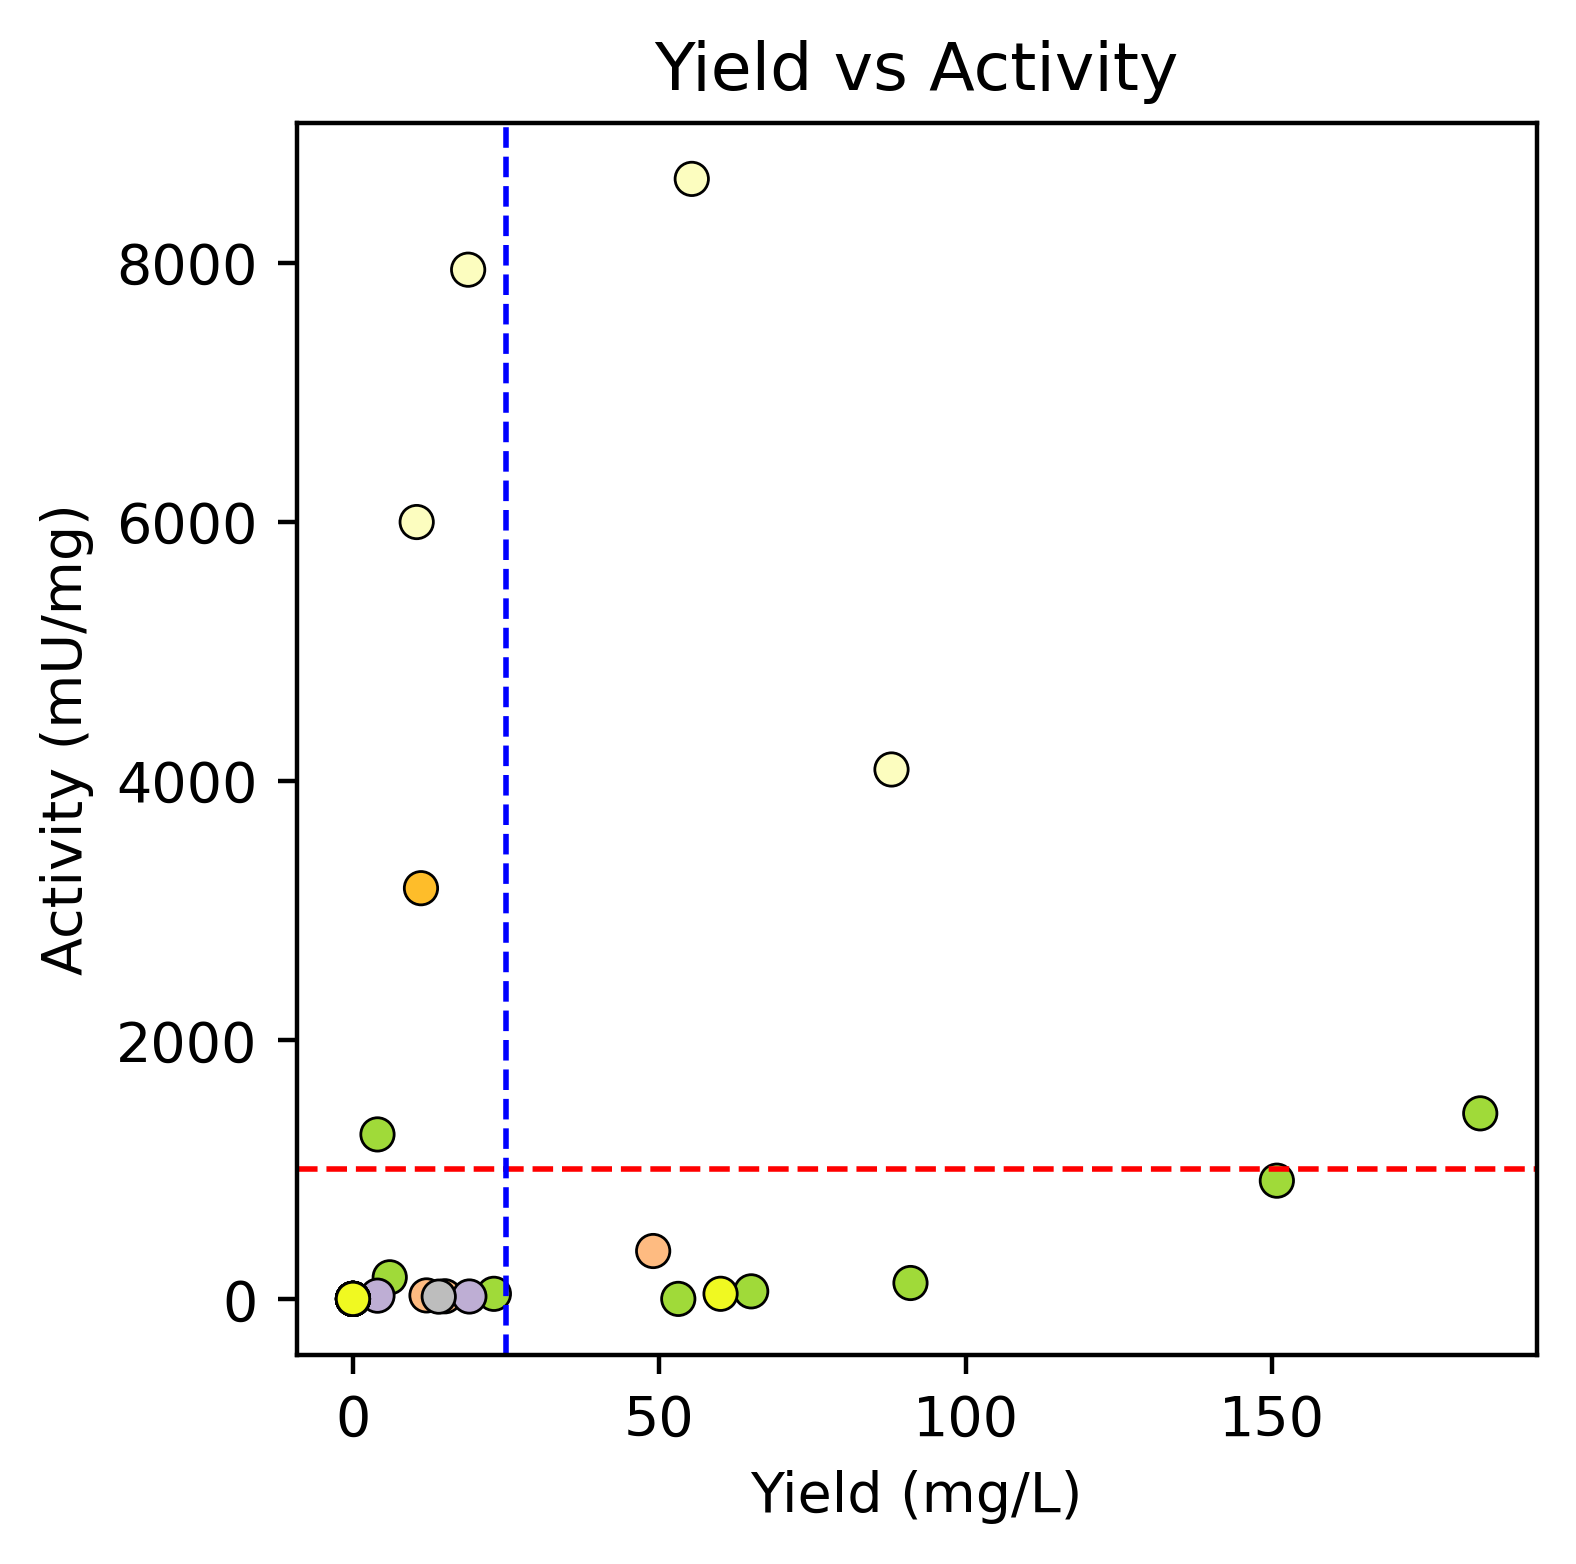

In [42]:
bl_activity_threshold = True
bl_yield = True

activity_threshold = 1000
yield_threshold = 25

class_color = {
    'Agaricomycetes': '#A0DA39',
    'Saccharomycetes': '#BEAED4',
    'Dothideomycetes': '#FEBB81',
    'Eurotiomycetes': '#F0F921',
    'Sordariomycetes': '#FCFDBF',
    'Leotiomycetes': '#FEBD2A',
    'Cestoda': '#BDBDBD',
}

colors = df['class'].map(class_color)

plt.figure(figsize=(4, 4), dpi=400)
scatter = plt.scatter(df['Yield (mg/L)'], df['activity(mU/mg)'], c=colors, edgecolors='black', linewidths=0.5)

if bl_activity_threshold:
    plt.axhline(y=activity_threshold, color='red', linestyle='--', linewidth=1)
if bl_yield:
    plt.axvline(x=yield_threshold, color='blue', linestyle='--', linewidth=1)

plt.title('Yield vs Activity')
plt.xlabel('Yield (mg/L)')
plt.ylabel('Activity (mU/mg)')

# for cls in class_color:
#     plt.scatter([], [], color=class_color[cls], label=cls, edgecolors='black', linewidths=0.5)
# plt.legend(title='Class')

plt.show()

In [43]:
pd.read_csv(filenames['known_sequence'], sep='\t')['cls'].value_counts()

cls
Saccharomycetes    13
Agaricomycetes      5
Eurotiomycetes      2
Dothideomycetes     2
Name: count, dtype: int64

In [44]:
pd.DataFrame(results, columns=['class', f'highly active(>{activity_threshold}mU/mg)', 'active', 'total'])

,class,highly active(>1000mU/mg),active,total
0,Agaricomycetes,2,7,10
1,Saccharomycetes,0,2,4
2,Dothideomycetes,0,3,6
3,Eurotiomycetes,0,1,5
4,Sordariomycetes,4,4,4
5,Leotiomycetes,1,1,4
6,Cestoda,0,1,1


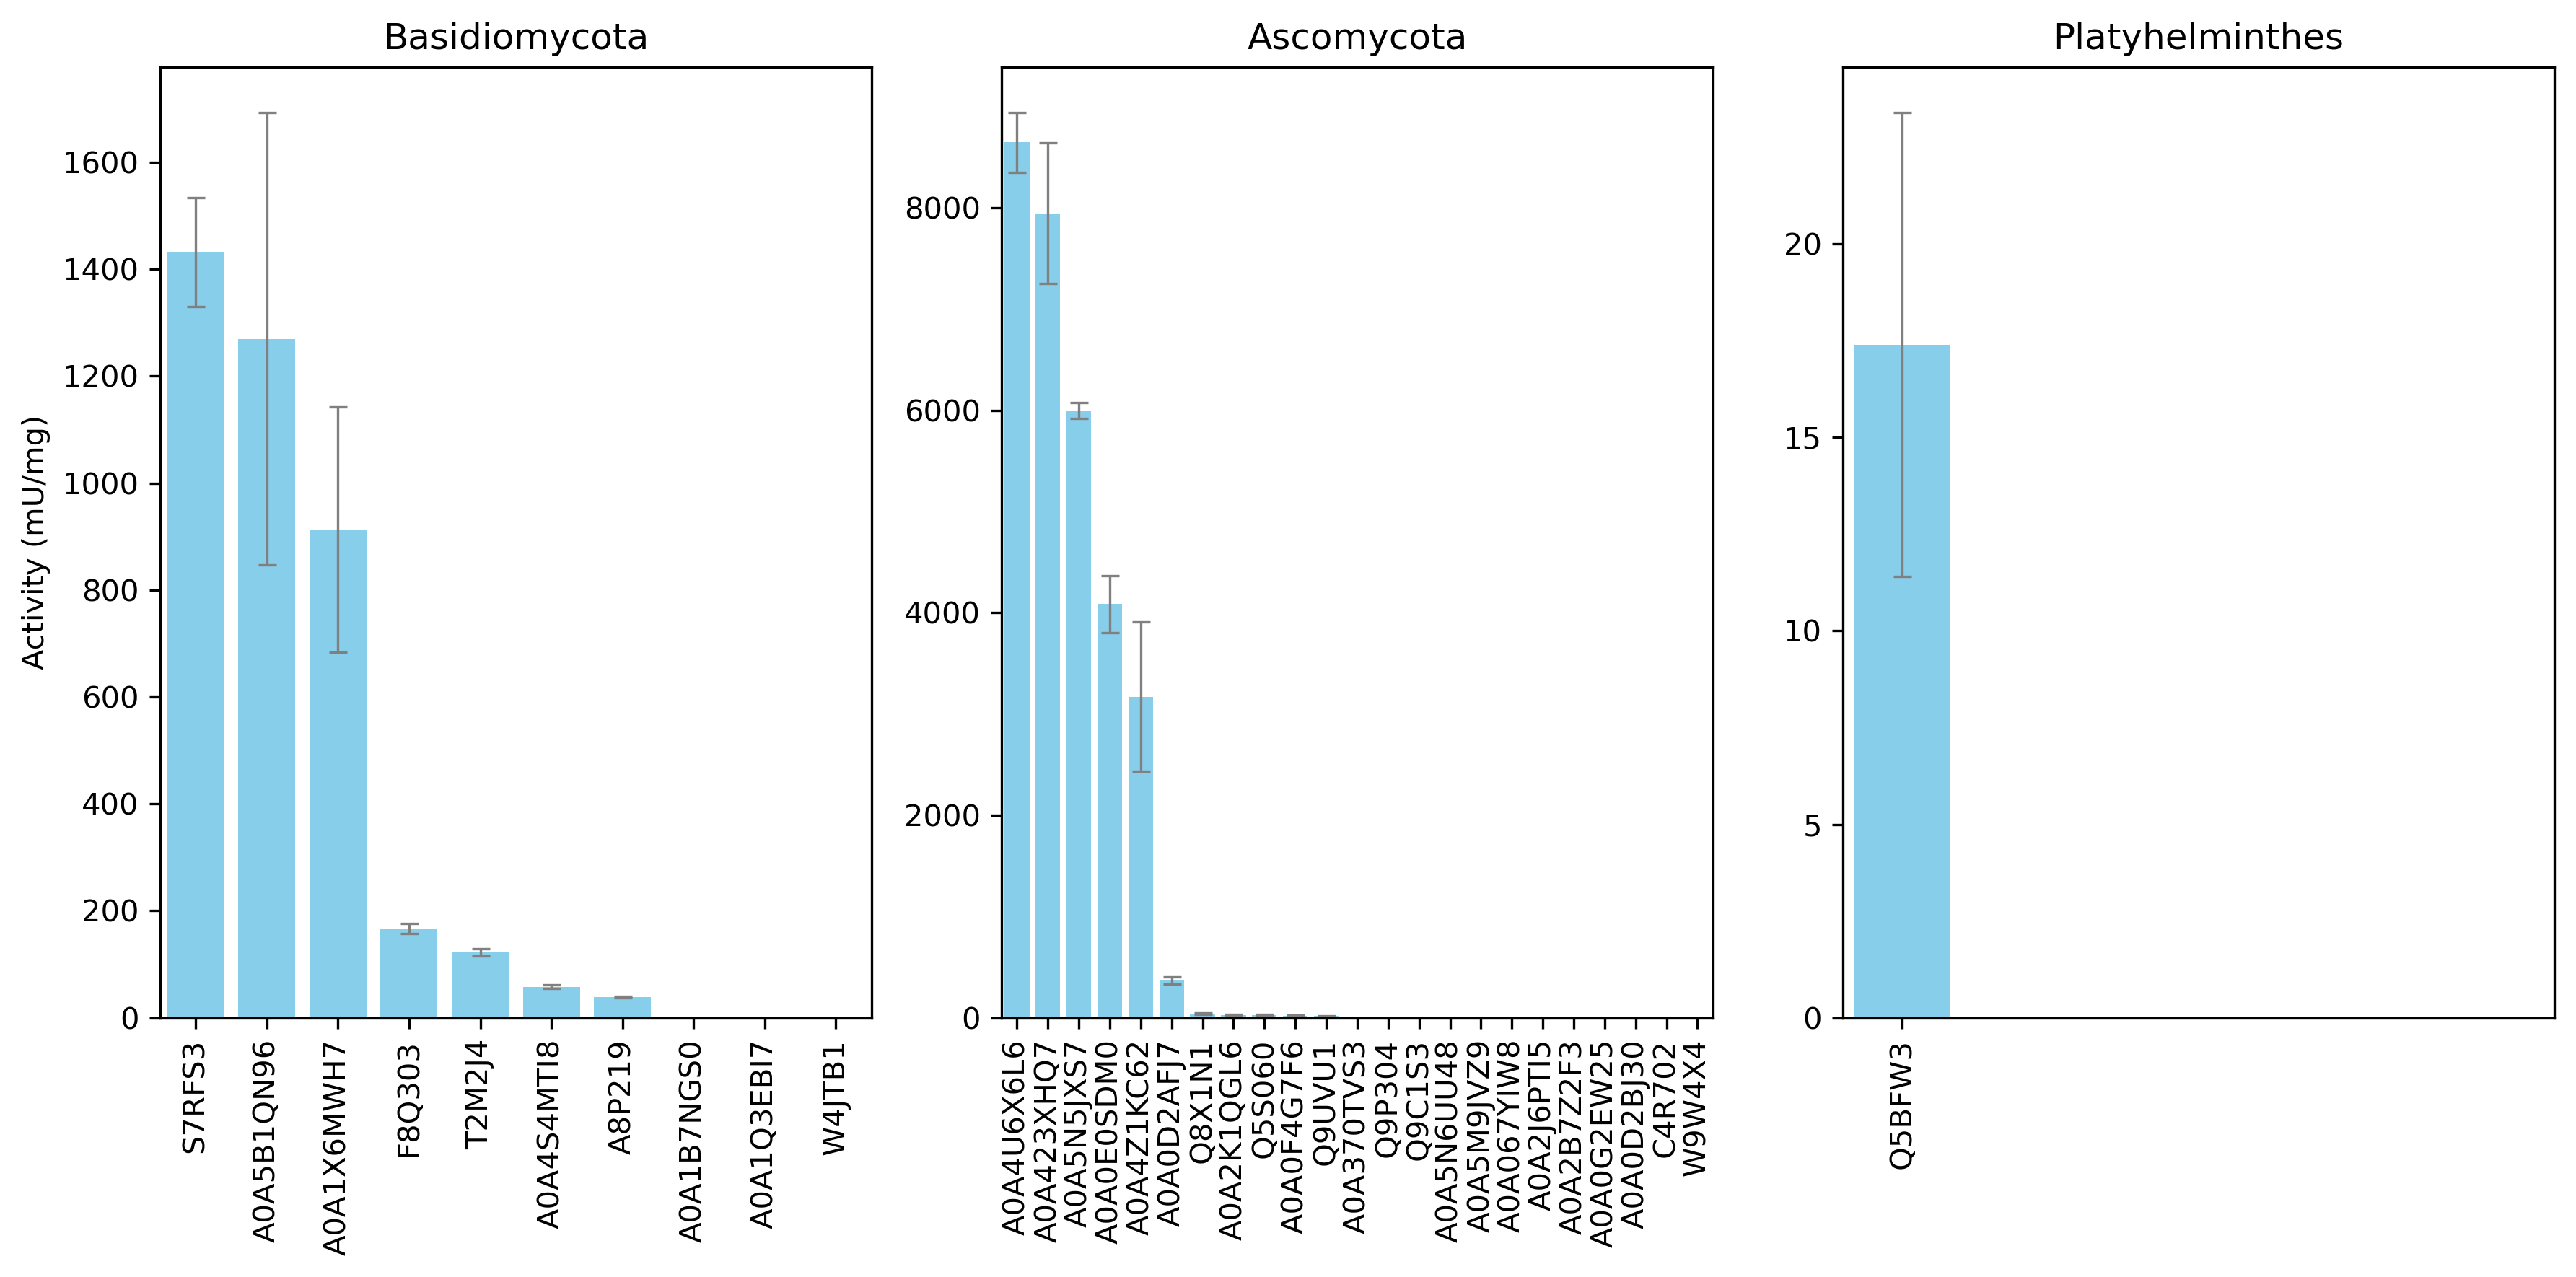

In [45]:
# Adjusted code to apply a similar visualization style for phylum
phylums = ['Basidiomycota', 'Ascomycota', 'Platyhelminthes']
fig_phylum, axes_phylum = plt.subplots(1, 3, figsize=(12, 6), dpi=300)
axes_phylum = axes_phylum.flatten()


for i, phyl in enumerate(phylums):
    subset = df[df['phylum'] == phyl]
    subset = subset.sort_values(by='activity(mU/mg)', ascending=False)
    ax = axes_phylum[i]
    x_positions = range(len(subset))  # Adjust x positions based on the subset size

    # Plot with a consistent bar width
    ax.bar(
        x_positions,
        subset['activity(mU/mg)'],
        yerr=subset['SD'],
        color='skyblue',
        width=0.8,
        error_kw={
            'elinewidth': 0.8,
            'ecolor': 'gray',
            'capsize': 3,
            'capthick': 0.8
        }
    )
    
    # Adjust xlim to maintain visual consistency
    ax.set_xlim([-0.5, -0.5+max(6, len(subset))])
    ax.set_title(f"{phyl}")
    ax.set_ylabel("Activity (mU/mg)" if i == 0 else "")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subset['r_name'], rotation=90)
    # ax.set_xlabel("r_name")

fig_phylum.tight_layout()
plt.show()


In [46]:
### corelation

# plt.scatter(experiment_result_picked_with_tax['activity(mU/mg)'], experiment_result_picked_with_tax['score'])



In [47]:
sequence_picked_results = pd.read_csv(filenames['sequence_picked_result'], sep='\t')
sequence_picked_results['length'] = sequence_picked_results['seq'].apply(lambda x: len(x.replace('-', '')))
sequence_picked_results['sequence_id_r'] = sequence_picked_results['sequence_id'].apply(lambda x: ncbi_uniprot_map.get(x,x))

experiment_result_picked_with_sequence_score = pd.merge(
    experiment_result[experiment_result['picked']==True], 
    sequence_picked_results[['seq_score', 'tax_score', 'sequence_id_r', 'length']], 
    left_on='r_name', right_on='sequence_id_r', how='left'
).drop_duplicates(subset=['name'])



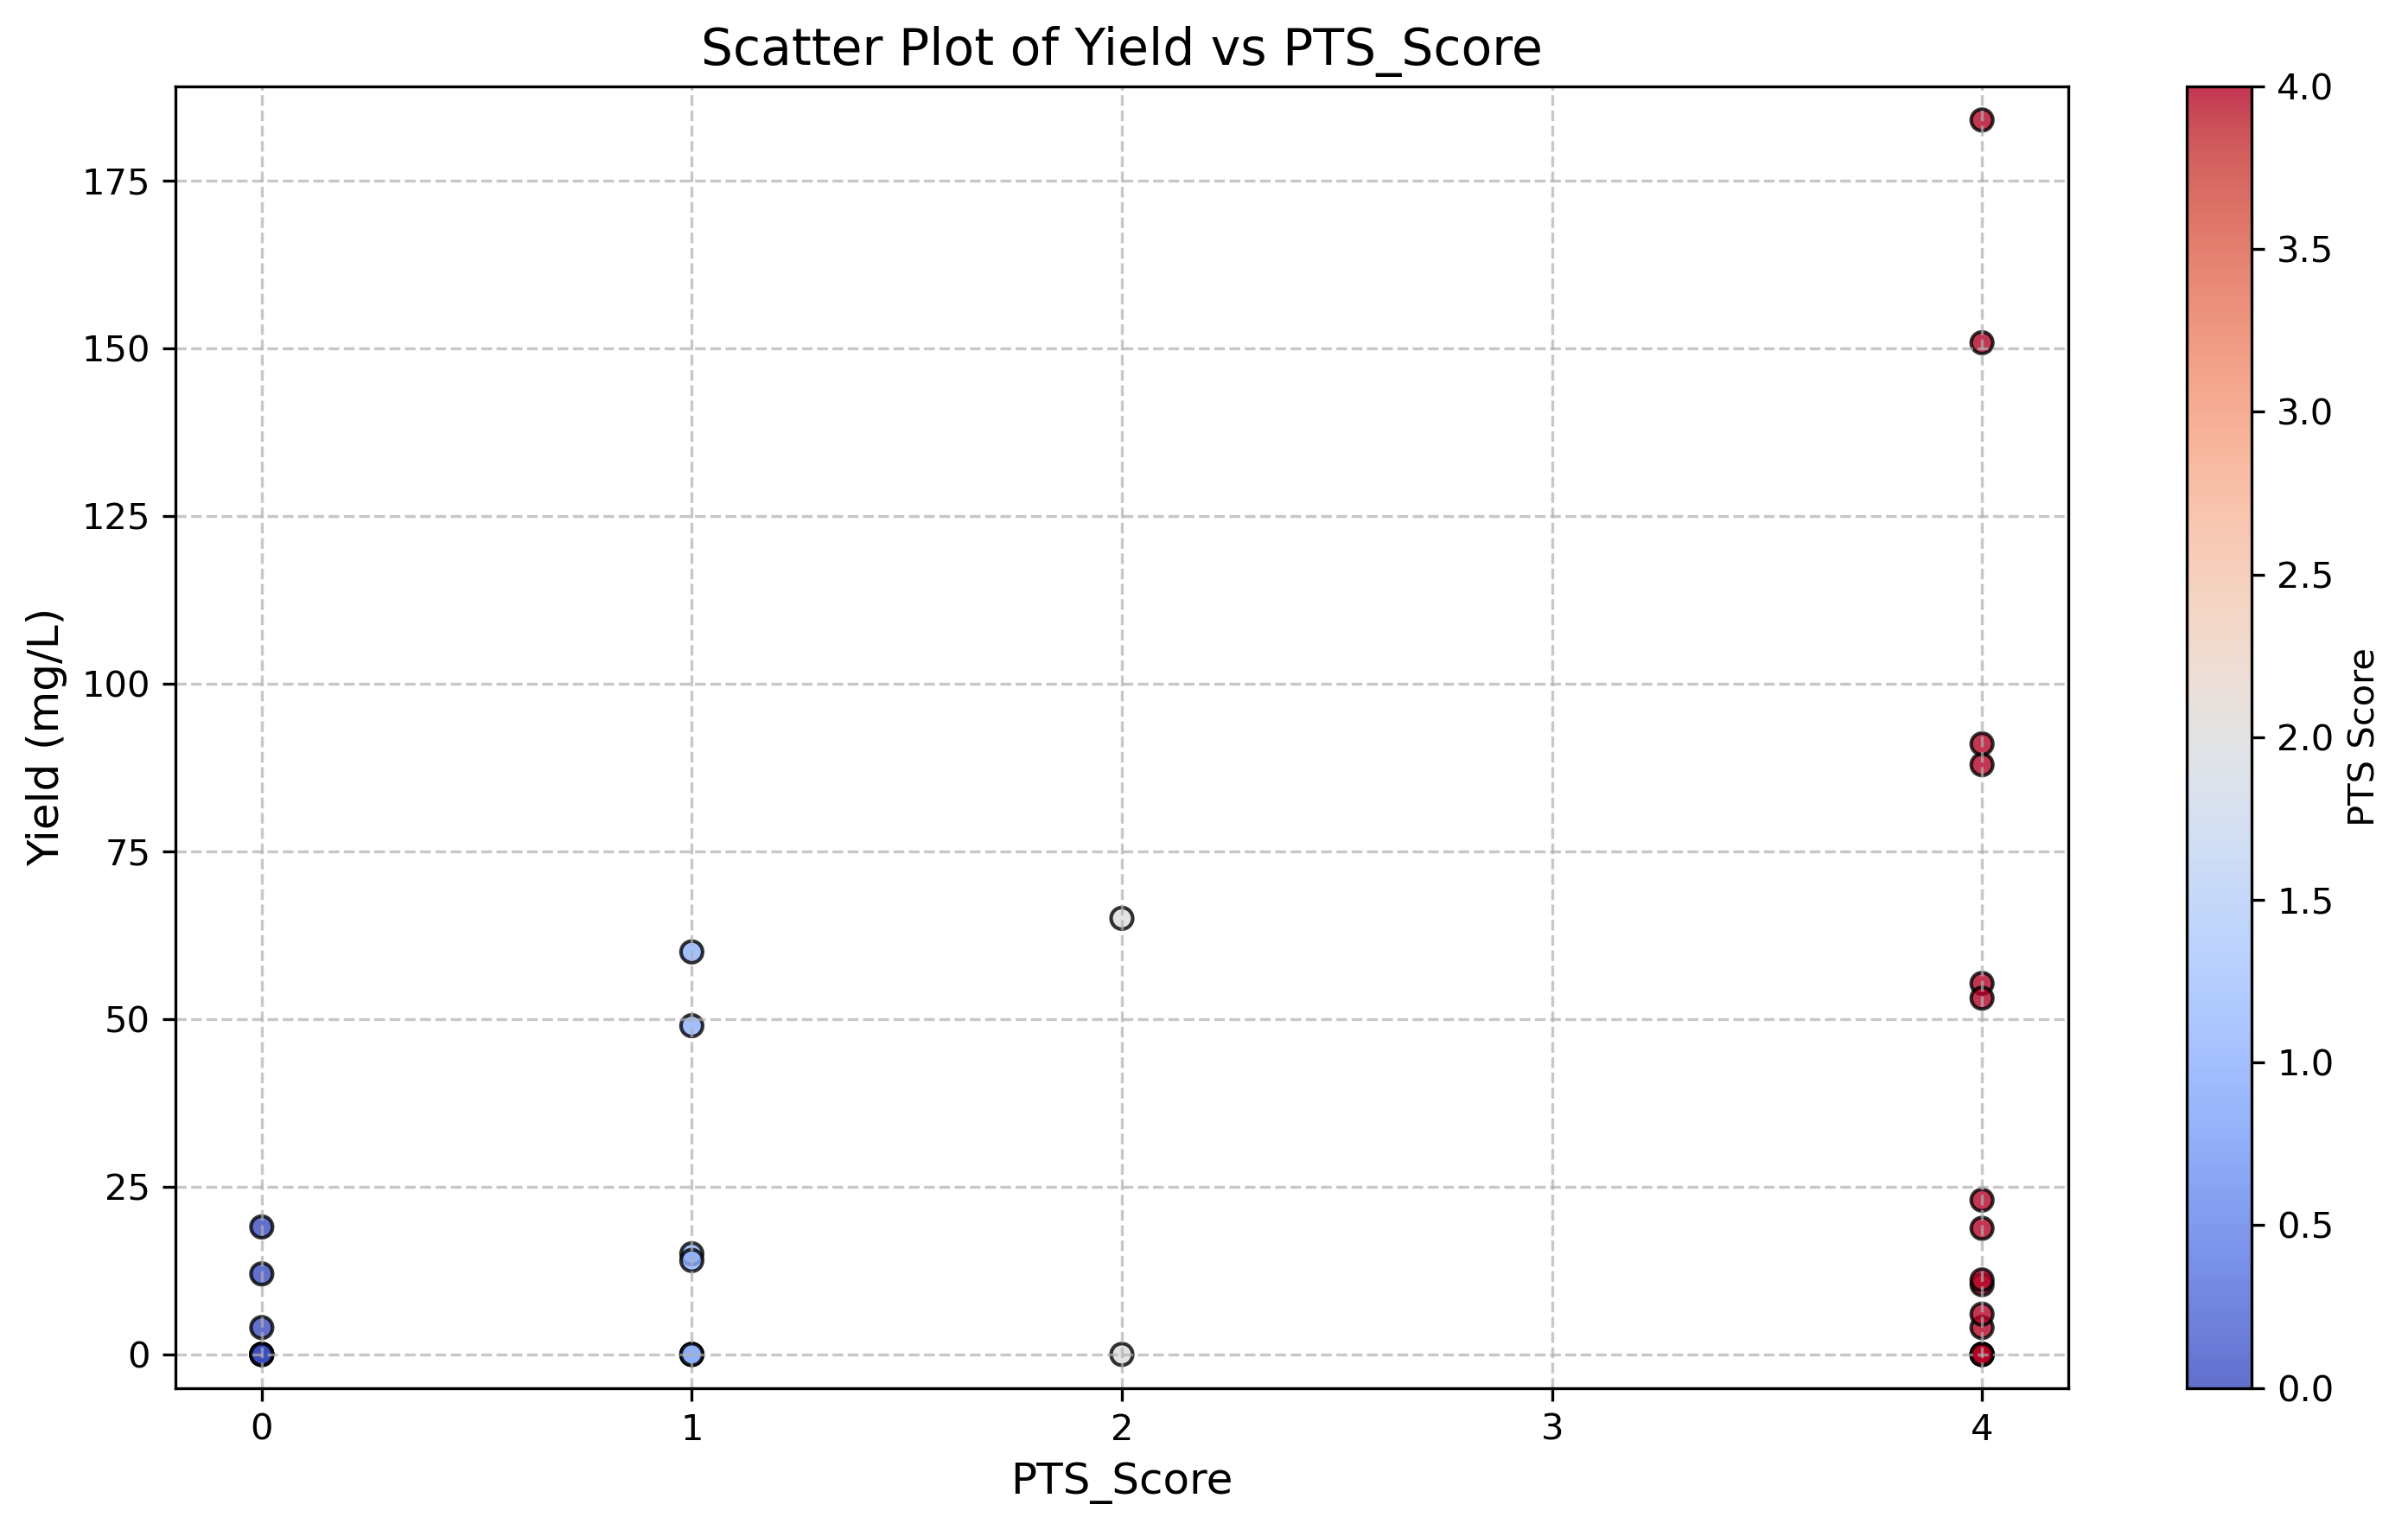

In [48]:
# Replace the long DataFrame name with a shorter one
df = experiment_result_picked_with_sequence_score
df['pts_score'] = (34 - df['seq_score'])*10

# Create scatter plot
plt.figure(figsize=(10, 6), dpi=300)
scatter = plt.scatter(
    df['pts_score'], 
    df['Yield (mg/L)'], 
    c=df['pts_score'],  # Color points by pts_score
    cmap='coolwarm', 
    edgecolor='black', 
    alpha=0.8
)
plt.colorbar(scatter, label="PTS Score")  # Add colorbar for seq_score
plt.title("Scatter Plot of Yield vs PTS_Score", fontsize=14)
plt.xlabel("PTS_Score", fontsize=12)
plt.ylabel("Yield (mg/L)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Adjust axis limits dynamically based on data range
plt.xlim((-0.2, 4+0.2))
plt.xticks(range(0,5))

plt.ylim(df['Yield (mg/L)'].min() - 5, df['Yield (mg/L)'].max() + 5)

plt.show()


In [30]:
pts_score_threshold = 0.8
yield_threshold = 25
a_11 = len(df[(df['pts_score'] > pts_score_threshold) & ( df['Yield (mg/L)'] > yield_threshold)])
a_10 = len(df[(df['pts_score'] > pts_score_threshold) & ( df['Yield (mg/L)'] < yield_threshold)])
a_01 = len(df[(df['pts_score'] < pts_score_threshold) & ( df['Yield (mg/L)'] > yield_threshold)])
a_00 = len(df[(df['pts_score'] < pts_score_threshold) & ( df['Yield (mg/L)'] < yield_threshold)])

observed = np.array([
    [a_11, a_10],
    [a_01, a_00]
])
print(observed)


[[ 9 17]
 [ 0  8]]


In [31]:
import numpy as np
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-squared statistic: {chi2:.2f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p:.4f}")
print("Expected value matrix:")
print(expected)

if p < 0.05:
    print("Reject the null hypothesis: The classification results are statistically significant.")
else:
    print("Fail to reject the null hypothesis: The classification results are not statistically significant.")




Chi-squared statistic: 2.20
Degrees of freedom: 1
p-value: 0.1382
Expected value matrix:
[[ 6.88235294 19.11764706]
 [ 2.11764706  5.88235294]]
Fail to reject the null hypothesis: The classification results are not statistically significant.
